In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read(image_uri) : #Put URI of image
    return iio.imread(image_uri)

def view(image) : #you can put a matrix or a URI

    if isinstance(image, str) :
          image = read(image)

    plt.imshow(image , cmap = 'gray')
    plt.show()
    
def save(image,filename) : #image is a Matrix
    iio.imwrite(filename, image)
    

def maskeffect(image,mask,f) : #You can put a matrix or a URI
    """
    Apply f on all the pixels 1 of the mask on the image
    """
    
    if isinstance(image, str) :
        image = read(image)
    
    if not mask.shape[:2] == image.shape[:2]:
        return print("⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️The mask doesn't fit the image ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️" )
    
    out = image.copy()
    
    for x in range(mask.shape[0]) :
        for y in range(mask.shape[1]) :
            if mask[x,y] == 1 :
                out[x,y] = f(x,y)
    return out

def generate_mask(image) :
    
    if isinstance(image, str) :
        image = read(image)
    
    out = np.zeros(image.shape)
    return out

def zone_mask(mask,startX, startY, endX, endY) :
    
    for x in range(startX,endX + 1):
        for y in range(startY,endY + 1):
            mask[x,y] = 1
    

Example of mask effect functions

In [16]:
def nullify(x,y):
    return 0

def invert(image):
    def inversion(x,y): 
        return 255- image[x,y]
    return inversion

def copy(image,startX,startY,offsetX,offsetY):
    def copy(x,y):
        return image[startX + (x-offsetX), startY + (y-offsetY)]
    return copy


[[137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 ...
 [ 18  18  27 ...  73  68  62]
 [ 22  22  32 ...  70  71  74]
 [ 22  22  32 ...  70  71  74]]


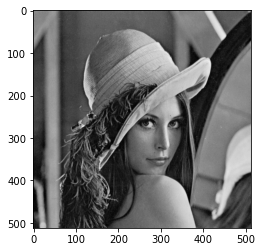

In [4]:
lena = read("lena.tif")
print(lena)
view(lena)

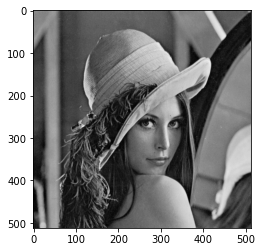

In [5]:
view("lena.tif")

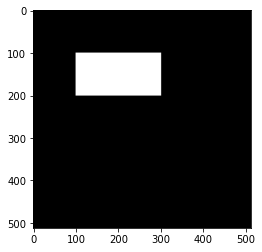

In [7]:
mask = generate_mask(lena)

zone_mask(mask,100,100,200,300)

save(mask,"mask.tif")

view(mask)

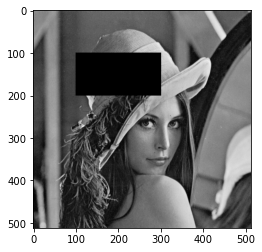

In [11]:
lena_effect = maskeffect(lena,mask,nullify)
view(lena_effect)

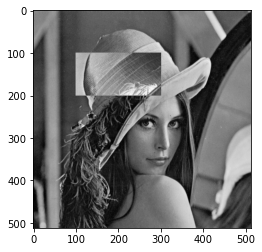

In [13]:
lena_invert = maskeffect(lena, mask, invert(lena))
view(lena_invert)

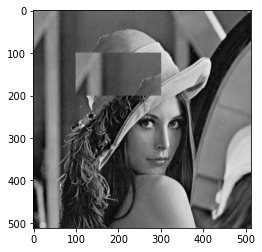

In [18]:
lena_copy = maskeffect(lena,mask, copy(lena,0,0,100,100))
view(lena_copy)